# Análise de Dados das Olimpíadas:
#### Equipe:
#### Humberto Nunes
#### Pedro Santana
#### Frederico Martins
#### André Maxwell

## 1 Introdução
#####  O projeto em questão visa realizar uma análise abrangente do histórico dos Jogos Olímpicos, utilizando um conjunto de dados abrangente que conte desde as primeiras Olimpíadas modernas em 1896 até os eventos mais recentes em 2020. O objetivo principal é extrair insights valiosos e responder a algumas perguntas fundamentais sobre o panorama olímpico mundial.


## 2 Objetivos

##### **1.Gerar um Ranking dos países com Mais Medalhas:** Uma das questões centrais que buscamos responder é qual país acumulou o maior número de medalhas ao longo dos anos. Isso nos permitirá entender quais nações têm tido mais sucesso no cenário olímpico e possivelmente investigar os fatores que contribuem para esse desempenho.

##### **2.Analisar os Países Mais Frequentemente Sede dos Jogos Olímpicos:** Além disso, exploraremos quais países têm sido os anfitriões mais frequentes dos Jogos Olímpicos. Isso nos dará uma visão sobre a distribuição geográfica dos eventos olímpicos.

##### **3.Determinar a Melhor Idade para Convocar um Atleta:** Outro aspecto interessante é investigar a idade ideal para convocar um atleta para os Jogos Olímpicos. Analisaremos as idades dos competidores que obtiveram sucesso e tentaremos identificar se existe uma faixa etária que demonstra um desempenho significativamente superio

##### **4.Analisar o retrospecto dos países sede:** investigando padrões de frequência e impacto das sedes olímpicas ao desempenho dos anfitriões do evento.

In [331]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
%matplotlib inline


## 3 Tratamento dos dados

##### Utilizamos varios bancos de dados, para realizar uma análise abrangente, de inicio filtramos as colunas para retirarmos os atletas que não tinha recebido nenhuma medalha para poder extrair a média, mediana e moda das suas idades. Em seguida relacionando as colunas dos data sets e fundindo em um só dataframe, conseguimos extrair mais informaçôes como quantidade de vezes que um país sediou as olimpiadas. Feito essa filtragem e união dos datasets, partimos para a geracão de graficos.

In [284]:
caminho_arquivo_csv = 'tabela_filtrada.csv'
tabela_filtrada = pd.read_csv(caminho_arquivo_csv)
#Faz a leitura da tabela csv

In [285]:
tabela_filtrada #Visualização da tabela

,Unnamed: 0,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,3,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,12,37,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,13,38,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,15,41,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
4,16,42,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,286078,270641,Sergey Mikhaylovich Zubov,Male,21.0,Unified Team,EUN,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
41496,286122,270827,Matja Zupan,Male,19.0,Yugoslavia,YUG,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
41497,286154,270876,Pirmin Zurbriggen,Male,25.0,Switzerland,SUI,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Downhill,Gold
41498,286156,270878,Pirmin Zurbriggen,Male,25.0,Switzerland,SUI,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze


## 4 Analise dos dados

In [286]:
media_idade = tabela_filtrada['Age'].mean()
print(round(media_idade,2))
#Calculando a média dos atletas e printando

25.99


In [287]:
mediana_idade = tabela_filtrada['Age'].median()
print(round(mediana_idade,2))

25.0


In [288]:
moda_idade = tabela_filtrada['Age'].mode()
print(moda_idade)

#Calcula a moda da idade dos atletas

0    23.0
Name: Age, dtype: float64


In [289]:
dispercao_idades = tabela_filtrada['Age'].describe() 
print(round(dispercao_idades,2))
#Calcula o desvio padrão: 5.88

count    41500.00
mean        25.99
std          5.88
min         10.00
25%         22.00
50%         25.00
75%         29.00
max         73.00
Name: Age, dtype: float64


### 4.1 Idade ideal para competir

Já obtemos 3 informações úteis a respeito da relação da idade com as medalhas, pois temos:

**Média de idade dos medalhistas:** 26 anos

**Mediana de idade dos medalhistas:** 25 anos

**Moda de idade dos medalhistas:** 23 anos

Isso já mostra que a faixa etária ideal para se convocar um atleta em geral, é de 23 anos a principío, uma vez que é a idade que tem mais atletas medalhistas.


### 4.2 Retrospecto do Brasil

In [290]:
ouro_brasil = tabela_filtrada[(tabela_filtrada['Medal'] == 'Gold') & (tabela_filtrada["Team"]== "Brazil")] 
ouro_brasil.shape[0]

#Calcula a quantidade de medalhas de ouro do Brasil 

132

In [291]:
total_medalhas_brasil = tabela_filtrada[tabela_filtrada["Team"] == "Brazil"].shape[0]
print(total_medalhas_brasil)

#Calcula o total de medalhas do Brasil

503


In [292]:
media_brasil = total_medalhas_brasil/32
print(round(media_brasil,2))

#Calcula a media de medalhas do Brasil

15.72


Agora sabemos que o Brasil apresenta : 

**132 medalhas de ouro**

**503 medalhas no total**

**com uma média de 15.72 medalhas por edição**

### 4.3 Analise do bloxploat das idades

<Axes: xlabel='Age'>

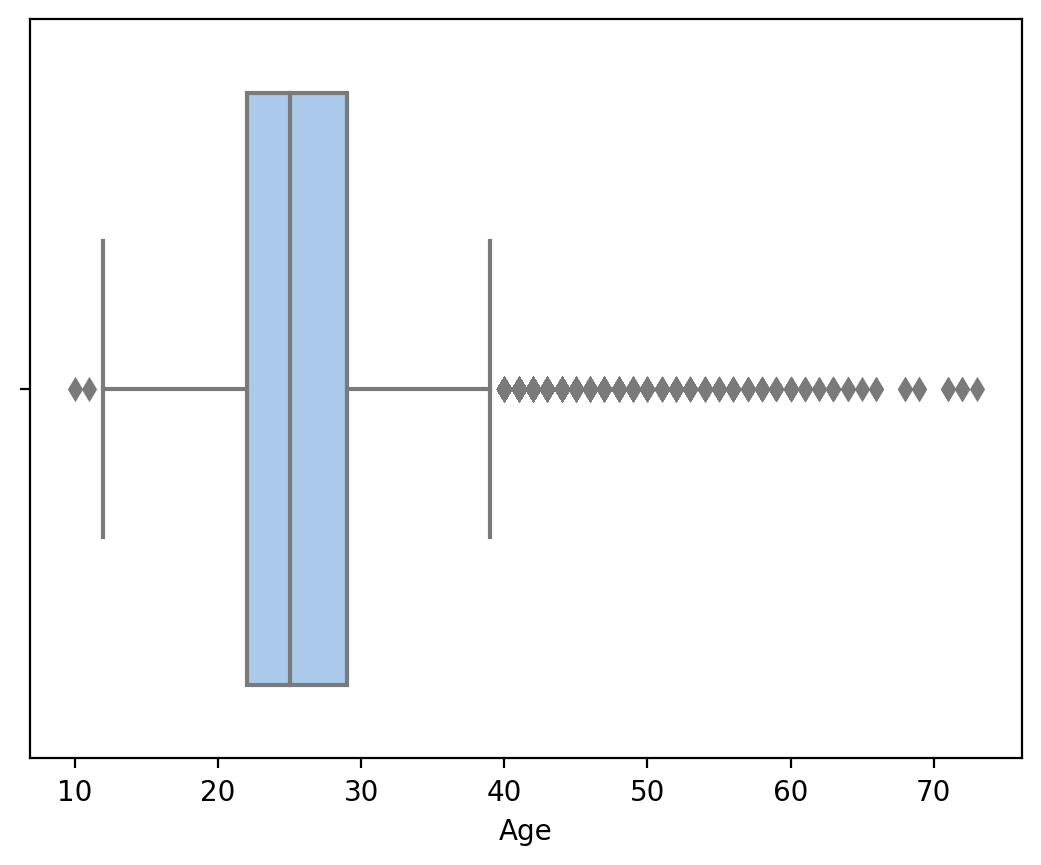

In [293]:
sns.boxplot(data = tabela_filtrada, x = "Age")

#Gera o gráfico de Boxplot da idade dos atletas

Aqui podemos extrair informações importantes sobre as idades dos atletas que já foram medalhistas. Primeiramente, observamos que existem muitos outliers em nosso boxplot, o que indica que muitos atletas com idades mais avançadas já ganharam algumas medalhas. Essa é uma informação importante que nos mostra que não se deve generalizar uma faixa etária específica para convocar atletas.

Por outro ângulo, ao observarmos, ainda, que há uma concentração de 75% dos atletas medalhistas na faixa de idade entre 23 a 28 anos, podemos concluir que existe uma maior possibilidade de um atleta ser medalhista estando nessa faixa etária

### 4.3 Gerando um ranking dos países mais vencedores

In [294]:
caminho_arquivo_regions = "all_regions.csv"
caminho_arquivo_athlete_games = "tabela_filtrada.csv"
df_regions = pd.read_csv(caminho_arquivo_regions)
df_athlete_games = pd.read_csv(caminho_arquivo_athlete_games)

In [295]:
total_medalhas = df_athlete_games.groupby('NOC')['Medal'].value_counts().unstack().fillna(0) #Filtramos os valores da coluna de medalhas e atribuimos 0 aos valores vazios 
total_medalhas['Total'] = total_medalhas.sum(axis=1) #Total de medalhas de cada país pelas categorias ouro prata e bronze .
total_medalhas = total_medalhas[total_medalhas['Total'] > 0] #Filtro para países que tenham pelo menos 1 medalha
top_32 = ranking.head(32 )#Filtramos os top 32 países mais vencedores
sns.set_palette("pastel") 

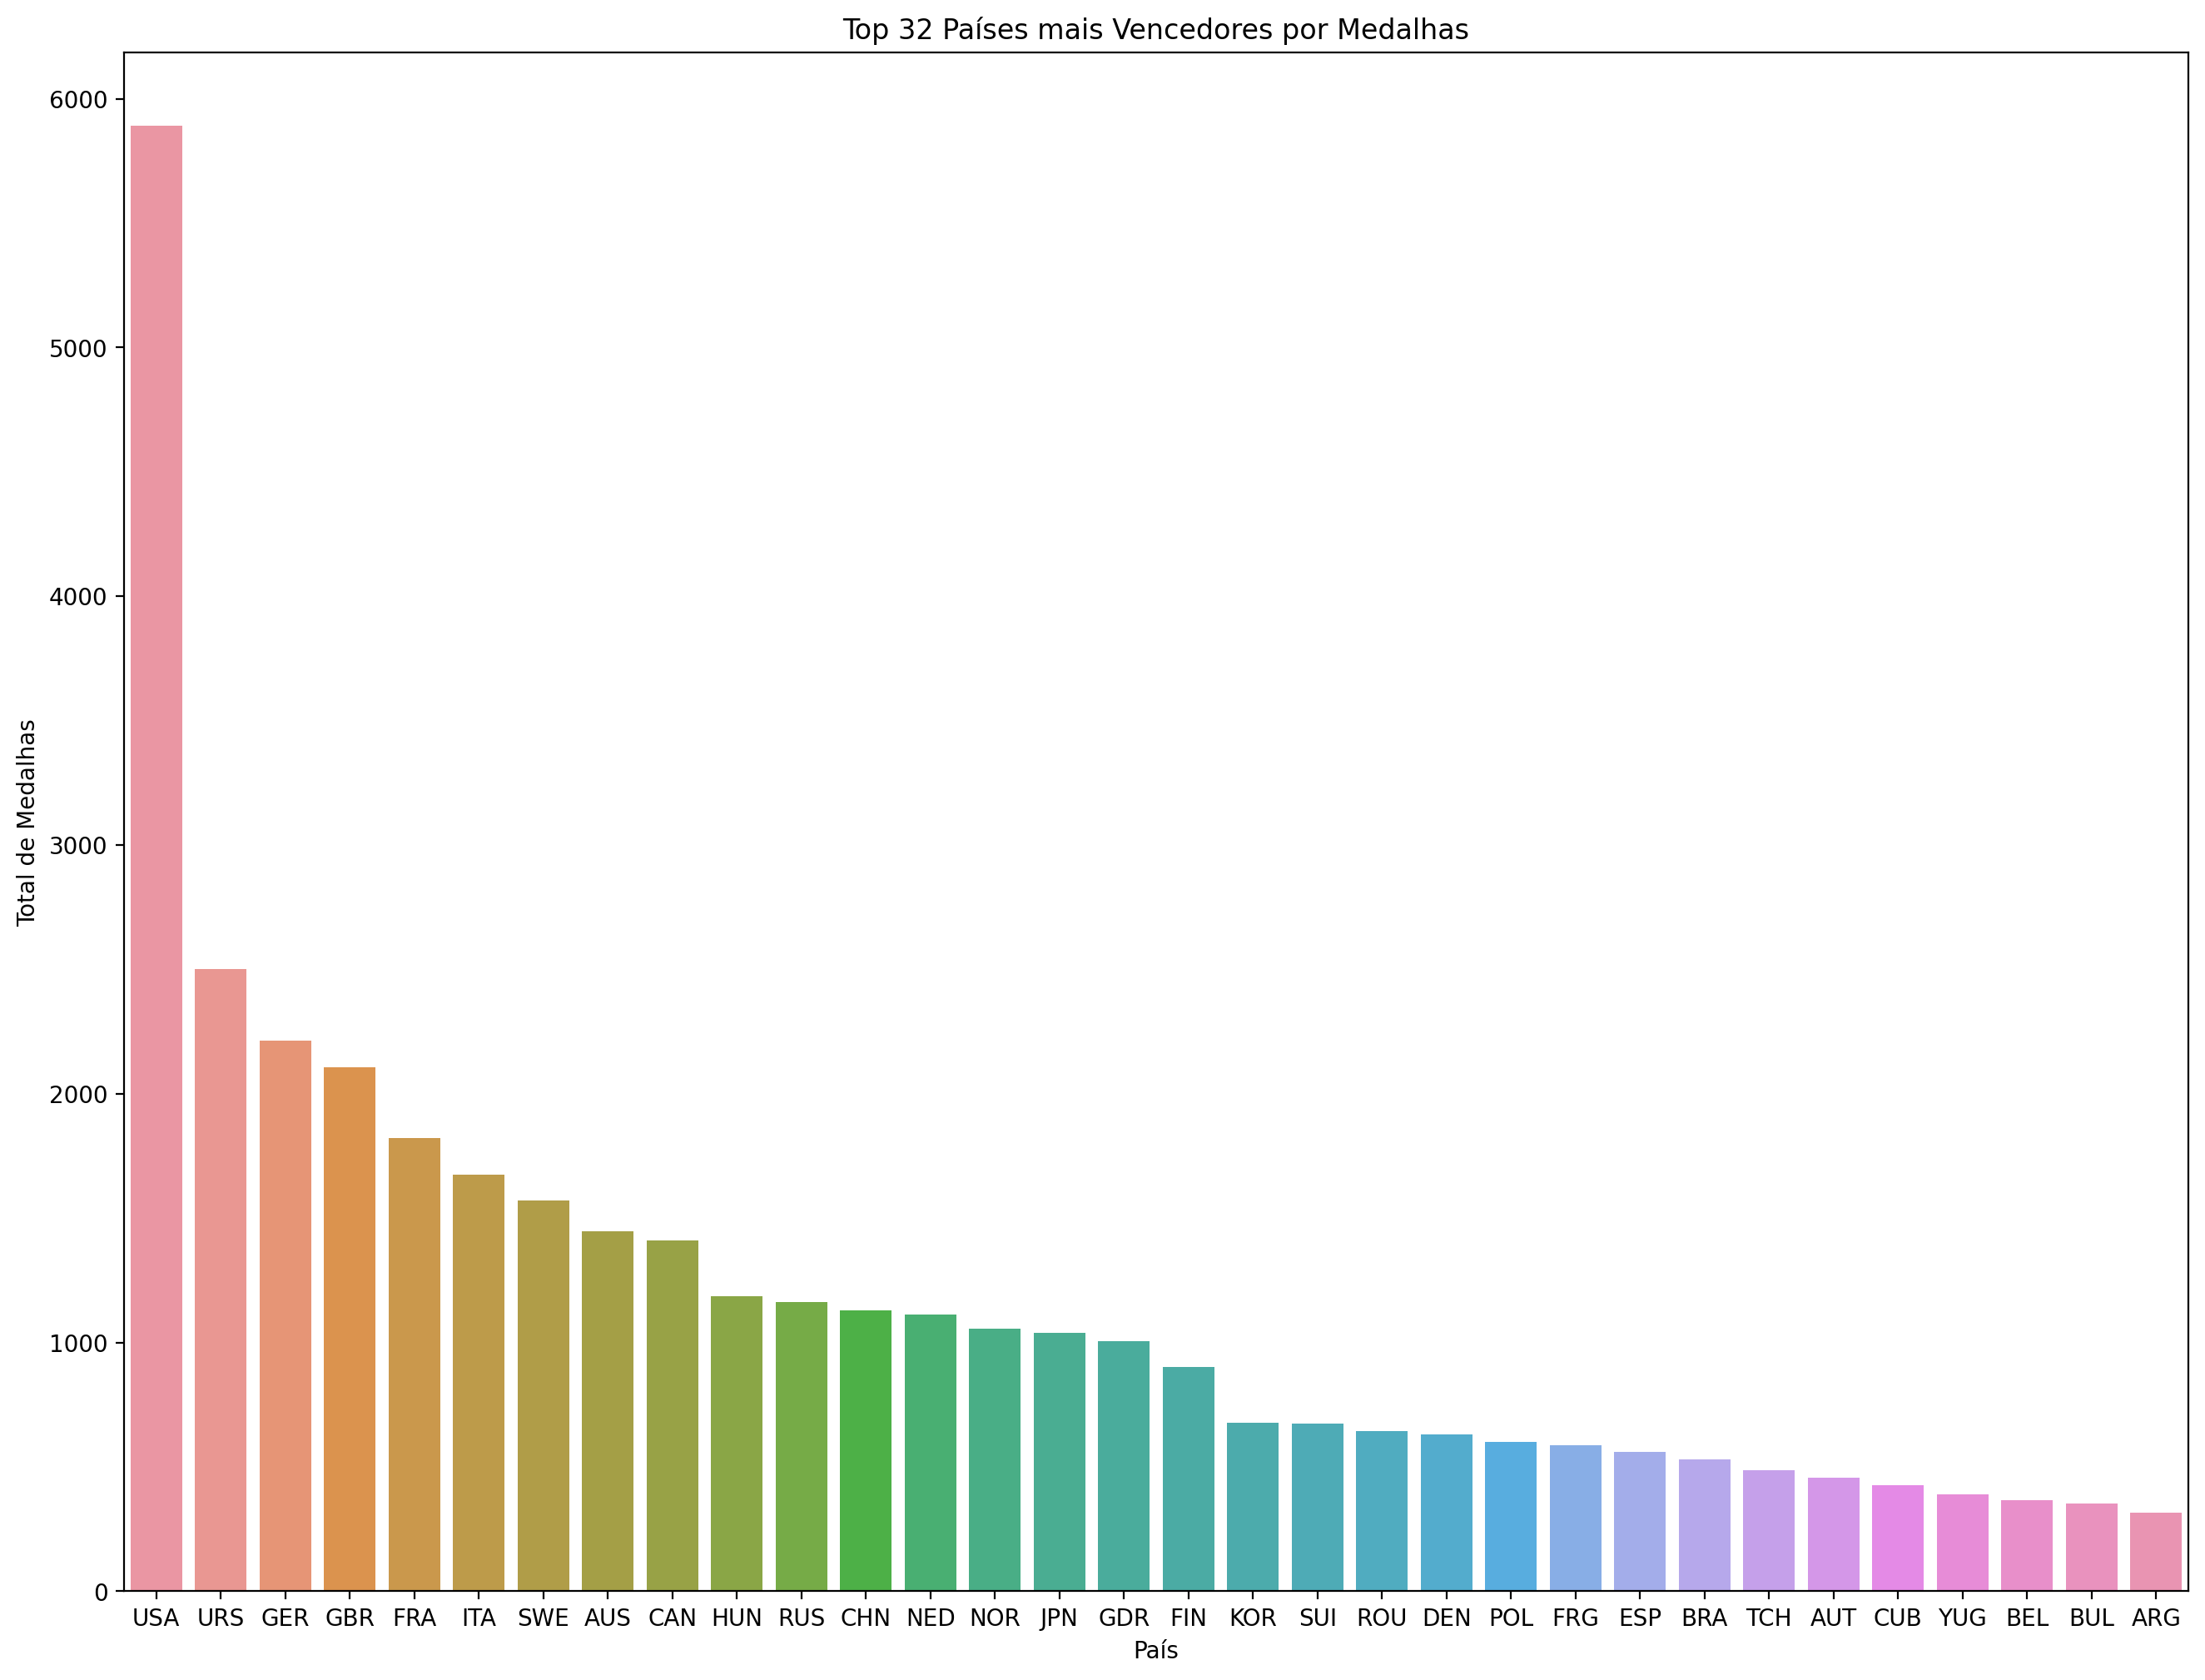

In [296]:
plt.figure(figsize=(16, 12))
sns.barplot(x=top_32.index, y='Total', data=top_32)
plt.ylabel('Total de Medalhas')
plt.xlabel('País')
plt.title('Top 32 Países mais Vencedores por Medalhas')
plt.show()

#Gráfico de Barra do top 32

Aqui notamos uma disparidade enorme dos **Estados Unidos** em relação aos outros países. Isso se dá por consequência de vários fatores, dentre eles o seu alto investimento no campo dos esportes.

Vale ressaltar que a União Soviética, que foi extinta há 33 anos, ainda se mantém no pódio em 2º lugar. Esse é um feito impressionante, dado que ela tem uma desvantagem de quase 8 Olimpíadas em relação aos demais. Se considerarmos a União Soviética e a Rússia juntas, sua diferença em relação aos Estados Unidos diminui consideravelmente.e.

### 4.4 Distribuição de medalhas por idades dos atletas 

In [297]:
mapeamento_medalhas = {'Nan': 0, 'Bronze': 1, 'silver': 2, 'Ouro': 3}
#Mapea as Medalhas

In [298]:
caminho_arquivo_all = 'all_athlete_games.csv'       
df_todos_atletas = pd.read_csv(caminho_arquivo_all)
#Faz leitura dos atletas

In [299]:
mapeamento_medalhas = {'Nenhuma': 1, 'Bronze': 2, 'Silver': 3, 'Gold': 4}
df_todos_atletas['Medalhas_numericas'] = np.where(df_todos_atletas['Medal'].notnull(), 1, 0) 
df_todos_atletas['Medalhas_numericas'] = df_todos_atletas['Medal'].map(mapeamento_medalhas)
#Filtra os atletas com medalha

In [300]:
df_todos_atletas = df_todos_atletas.dropna(subset=['Age']) #Retira atletas sem informação de idade
df_todos_atletas['Age'] = df_todos_atletas['Age'].astype(int) #Filtra idade de atletas

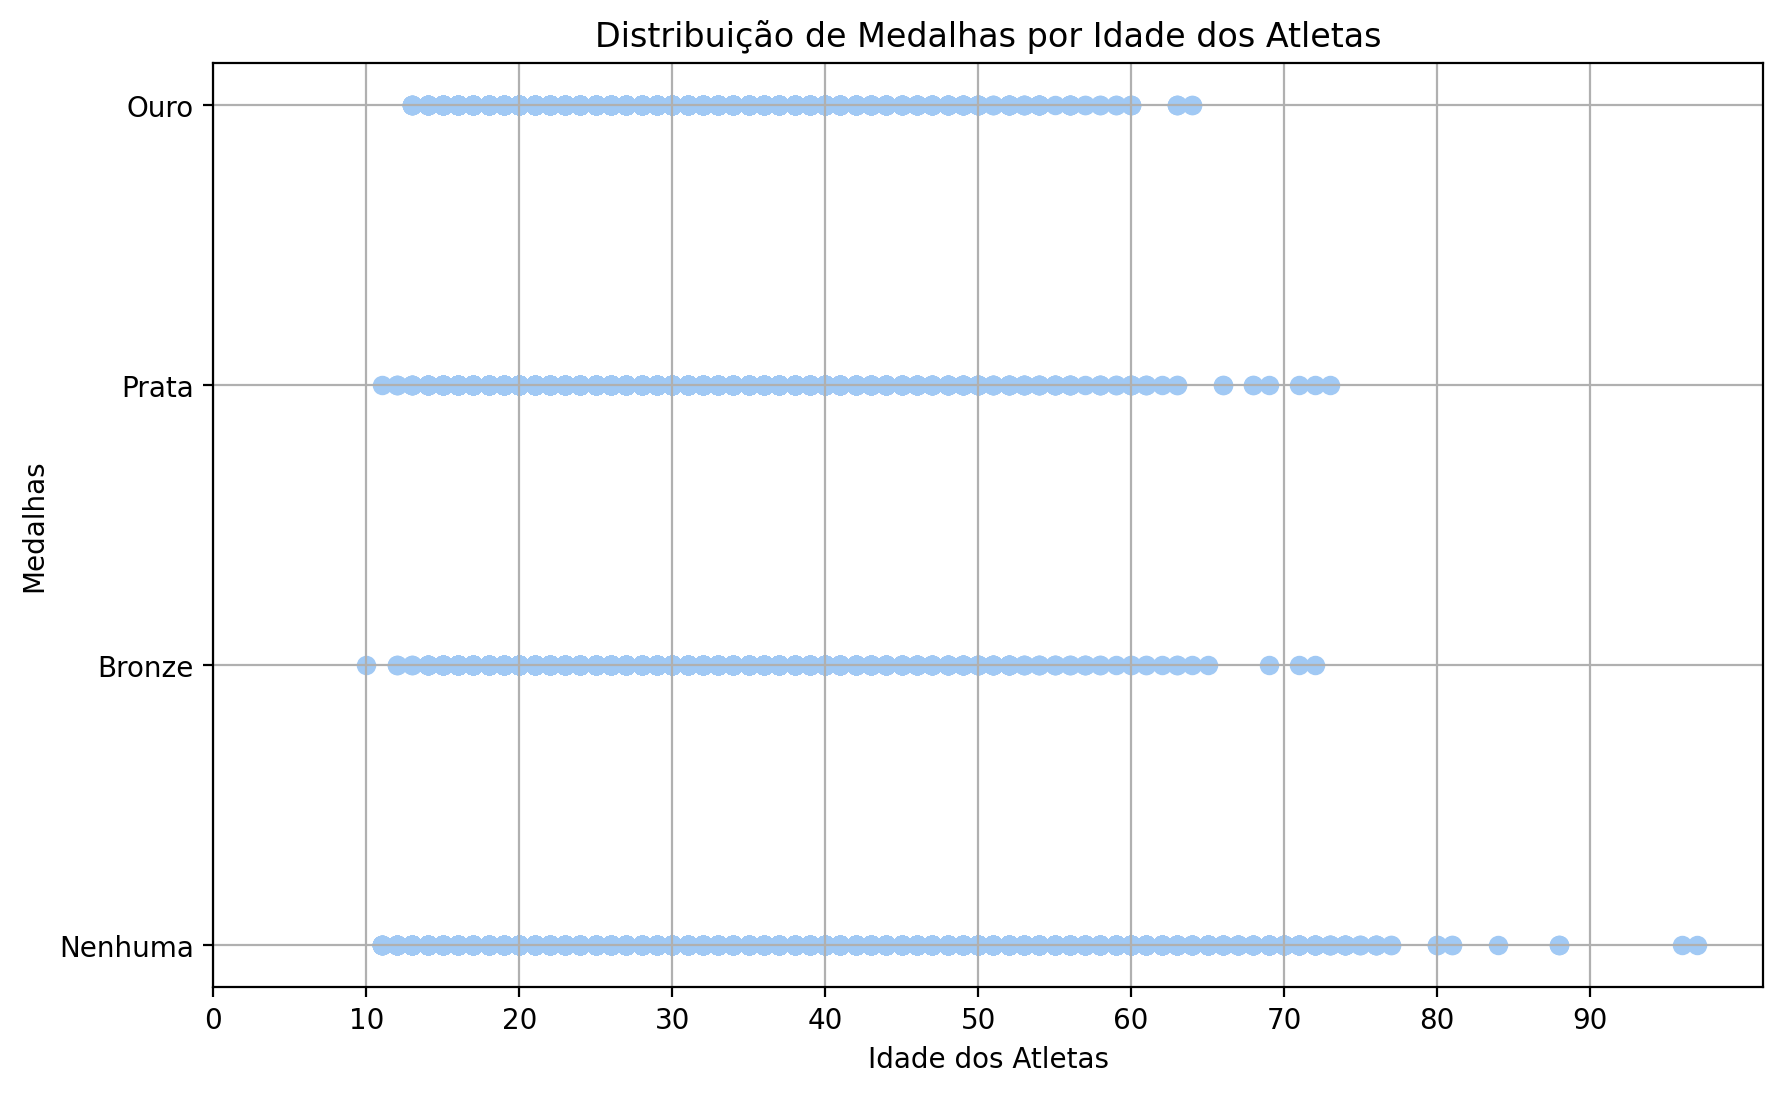

In [301]:
df_todos_atletas['Medalhas_numericas'].fillna(1, inplace=True) #vai substituir os Nan por 1


plt.figure(figsize=(10, 6)) 
plt.scatter(df_todos_atletas['Age'], df_todos_atletas['Medalhas_numericas'], alpha=1.0)
plt.xticks(ticks=range(0, df_todos_atletas['Age'].max(), 10))

plt.xlabel('Idade dos Atletas') 
plt.ylabel('Medalhas')
plt.title('Distribuição de Medalhas por Idade dos Atletas')
plt.yticks(ticks=[1, 2, 3, 4], labels=['Nenhuma', 'Bronze', 'Prata', 'Ouro'])
plt.grid(True)
plt.show()
#Gera gráfico de dispersão

In [302]:
df_ordenado = df_todos_atletas.sort_values(by='Age', ascending=False)

mais_velho = df_ordenado.iloc[0]
penultimo_mais_velho = df_ordenado.iloc[1]

#Filtra os atletas mais velhos a receberem medalha olímpica

#### Fato interessante: Os dois atletas "mais velhos". Ambos nâo estavam vivos quando participaram, pois os dois morreram em 1910, mas suas obras concorreram na olimpiadas, no esporte de competição de artes, e acabaram por contabilizar as suas idades a partir de quantos anos eles teriam quando suas obras ganharam


In [303]:
print("Penúltimo mais velho:")
print(penultimo_mais_velho)
print("\nMais velho:")
print(mais_velho)

#Apresenta os dados sobre os atletas mais velhos

Penúltimo mais velho:
Entry ID                                                       98118
Name                                                   Winslow Homer
Gender                                                          Male
Age                                                               96
Team                                                   United States
NOC                                                              USA
Year                                                            1932
Season                                                        Summer
City                                                     Los Angeles
Sport                                               Art Competitions
Event                 Art Competitions Mixed Painting, Unknown Event
Medal                                                            NaN
Medalhas_numericas                                               1.0
Name: 81200, dtype: object

Mais velho:
Entry ID                                 

### 4.5 Correlação entre a idade e medalhas

In [304]:
correlacao_idade_medalhas = df_todos_atletas['Age'].corr(df_todos_atletas['Medalhas_numericas'])
correlacao_idade_medalhas


0.02250109201202069

Percebemos que quando calculamos a correlação entre medalha e idade quase não existe, ela é muito fraca, justamente por termos muitas idade diferentes
que já conquistaram a medalha olímpica

### 4.6 Retrospectiva do país sede

Aqui queremos observar, quais países que tem esse sentimento de nacionalismo, onde os atletas sao originais dos países representantes

In [305]:
df = pd.read_csv('tabela_filtrada_por_country.csv')

In [306]:
city_to_country = {
    'Beijing': 'China',
    'Tokyo': 'Japan',
    'Paris': 'France',
    'Los Angeles': 'United States',
    'London': 'United Kingdom',
    'Seoul': 'South Korea',
    'Rio de Janeiro': 'Brazil',
    'Athens': 'Greece',
    'Sydney': 'Australia',
    'Barcelona': 'Spain',
    'Atlanta': 'United States',
    'Moscow': 'Russia',
    'Montreal': 'Canada',
    'Munich': 'Germany',
    'Mexico City': 'Mexico',
    'Rome': 'Italy',
    'Melbourne': 'Australia',
    'Helsinki': 'Finland',
    'Stockholm': 'Sweden',
    'Antwerp': 'Belgium',
    'Amsterdam': 'Netherlands',
    'Berlin': 'Germany',
    'Oslo': 'Norway',
    'Cortina d\'Ampezzo': 'Italy',
    'Squaw Valley': 'United States',
    'Innsbruck': 'Austria',
    'Grenoble': 'France',
    'Sapporo': 'Japan',
    'Sarajevo': 'Bosnia and Herzegovina',
    'Calgary': 'Canada',
    'Albertville': 'France',
    'Lillehammer': 'Norway',
    'Nagano': 'Japan',
    'Salt Lake City': 'United States',
    'Turin': 'Italy',
    'Vancouver': 'Canada',
    'Sochi': 'Russia',
    'Pyeongchang': 'South Korea',
    'Chamonix': 'France',
    'St. Moritz': 'Switzerland',
    'Lake Placid': 'United States',
    'Garmisch-Partenkirchen': 'Germany',
    'Antwerpen': 'Belgium',
    'Athina': 'Greece',
    'Moskva': 'Russia',
    'Roma': 'Italy',
    'St. Louis': 'United States'
}
substituições = {
    'Great Britain': 'United Kingdom',
    'England': 'United Kingdom',
    'United Kingdom': 'United Kingdom'}

In [307]:
df['country'] = df['city'].map(city_to_country)
df['Team'].replace(substituições, inplace=True)

In [308]:
df.to_csv('tabela_filtrada_por_country.csv', index=False)


In [309]:
occurrences = df[df['Team'] == df['country']]

# Contar o número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos
count_represented_home_country = occurrences.shape[0]

# Exibir o resultado
print("Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos:", count_represented_home_country)

Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos: 5410


In [310]:
# Filtrar as ocorrências onde a coluna 'Team' é igual à coluna 'country'
occurrences = df[df['Team'] == df['country']]

# Contar as ocorrências para cada país
country_counts = occurrences['Team'].value_counts()

# Exibir os resultados
print("Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos, por país:")
print(country_counts)


Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos, por país:
Team
United States     1178
United Kingdom     984
France             882
Germany            435
Australia          301
Japan              209
Spain              207
Canada             187
Italy              170
China              170
Sweden             158
Netherlands        102
Belgium             95
South Korea         75
Russia              56
Norway              49
Greece              48
Brazil              46
Finland             35
Austria             14
Mexico               9
Name: count, dtype: int64


In [311]:
country_palette = sns.color_palette("hsv", len(country_counts))

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

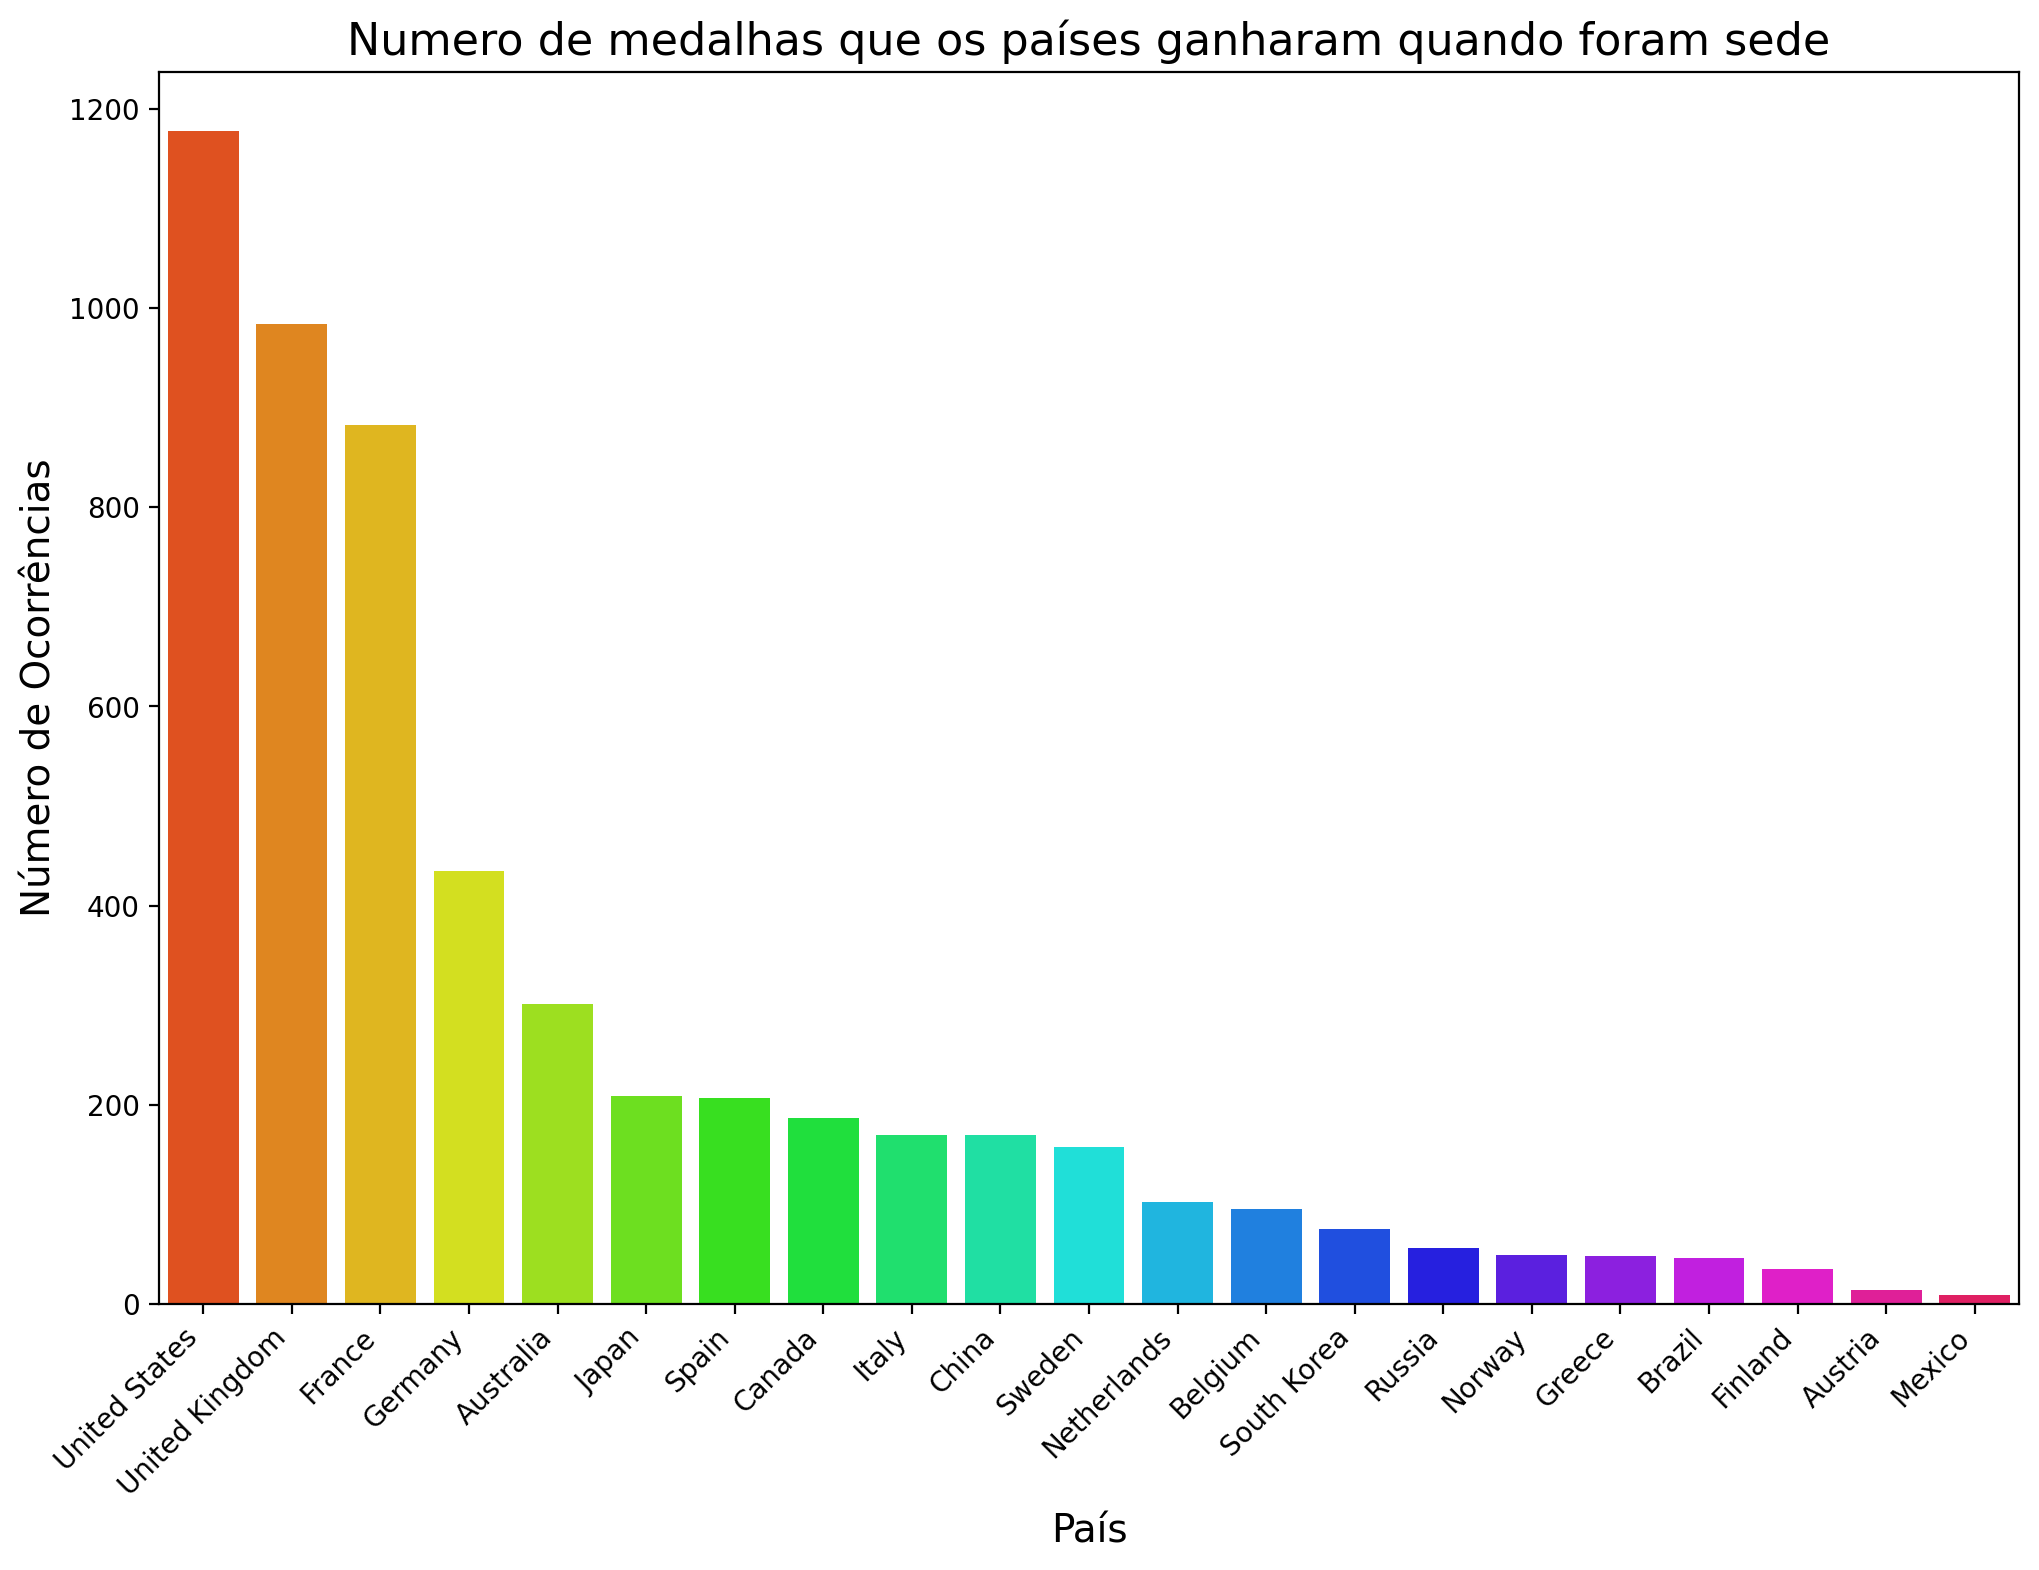

In [312]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=country_counts.index, y=country_counts.values, palette=country_palette)
plt.title('Numero de medalhas que os países ganharam quando foram sede', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Número de Ocorrências', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

### 4.7 Média média geral de medalha dos países

In [313]:
cities_per_country = df.groupby('country')['city'].nunique()
cities_per_country = cities_per_country.sort_values(ascending=False)


In [320]:
# Dados fornecidos
country_counts = {
    'United States': 1178,
    'United Kingdom': 984,
    'France': 882,
    'Germany': 435,
    'Australia': 301,
    'Japan': 209,
    'Spain': 207,
    'Canada': 187,
    'Italy': 170,
    'China': 170,
    'Sweden': 158,
    'Netherlands': 102,
    'Belgium': 95,
    'South Korea': 75,
    'Russia': 56,
    'Norway': 49,
    'Greece': 48,
    'Brazil': 46,
    'Finland': 35,
    'Austria': 14,
    'Mexico': 9
}

cities_per_country = {
    'United States': 6,
    'France': 4,
    'Japan': 3,
    'Canada': 3,
    'Germany': 3,
    'Russia': 2,
    'Norway': 2,
    'Australia': 2,
    'Italy': 2,
    'Finland': 1,
    'China': 1,
    'Greece': 1,
    'Austria': 1,
    'Brazil': 1,
    'Mexico': 1,
    'Netherlands': 1,
    'Bosnia and Herzegovina': 1,
    'Belgium': 1,
    'South Korea': 1,
    'Spain': 1,
    'Sweden': 1,
    'United Kingdom': 1
}

# Calculando a média de medalhas por país dividido pelo número de medalhas
medias = {}
for country, medals in country_counts.items():
    cidades = cities_per_country.get(country, 1)  # Se não houver cidade especificada, assuma 1
    media = medals / cidades
    medias[country] = media

# Calculando a média geral
media_geral = sum(medias.values()) / len(medias)

print("Médias por país:")
for country, media in medias.items():
    print(f"{country}: {media}")

print("\nMédia geral:", media_geral)


Médias por país:
United States: 196.33333333333334
United Kingdom: 984.0
France: 220.5
Germany: 145.0
Australia: 150.5
Japan: 69.66666666666667
Spain: 207.0
Canada: 62.333333333333336
Italy: 85.0
China: 170.0
Sweden: 158.0
Netherlands: 102.0
Belgium: 95.0
South Korea: 75.0
Russia: 28.0
Norway: 24.5
Greece: 48.0
Brazil: 46.0
Finland: 35.0
Austria: 14.0
Mexico: 9.0

Média geral: 139.27777777777777


### 4.8 Países que mais sediaram as olimpiadas

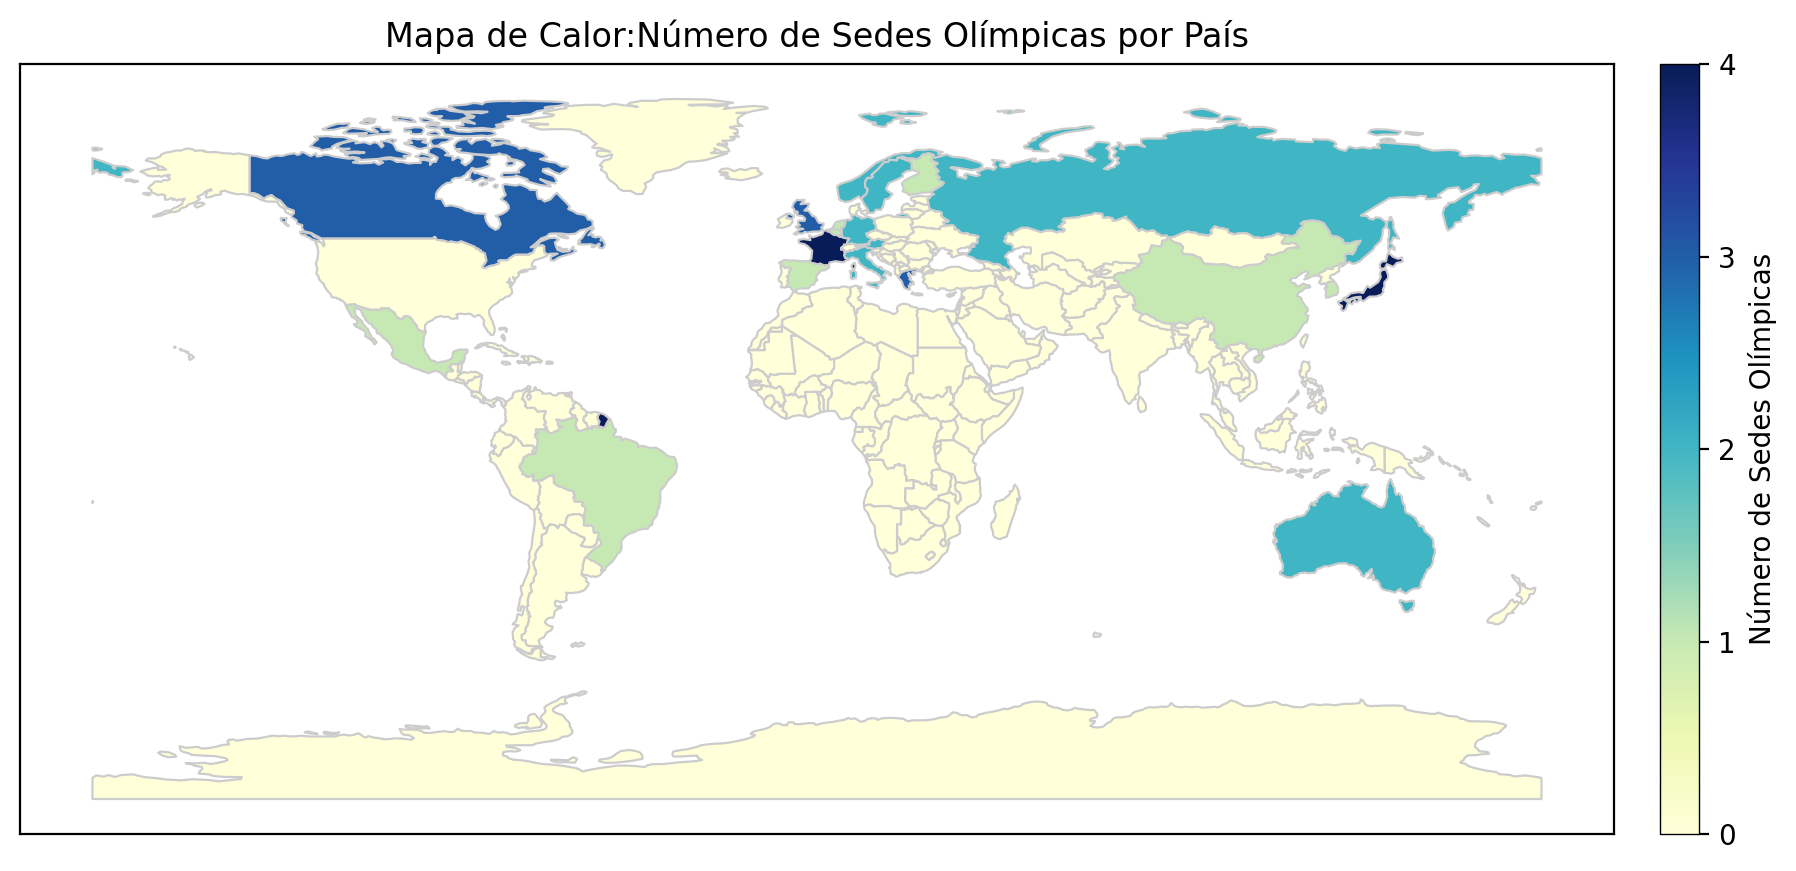

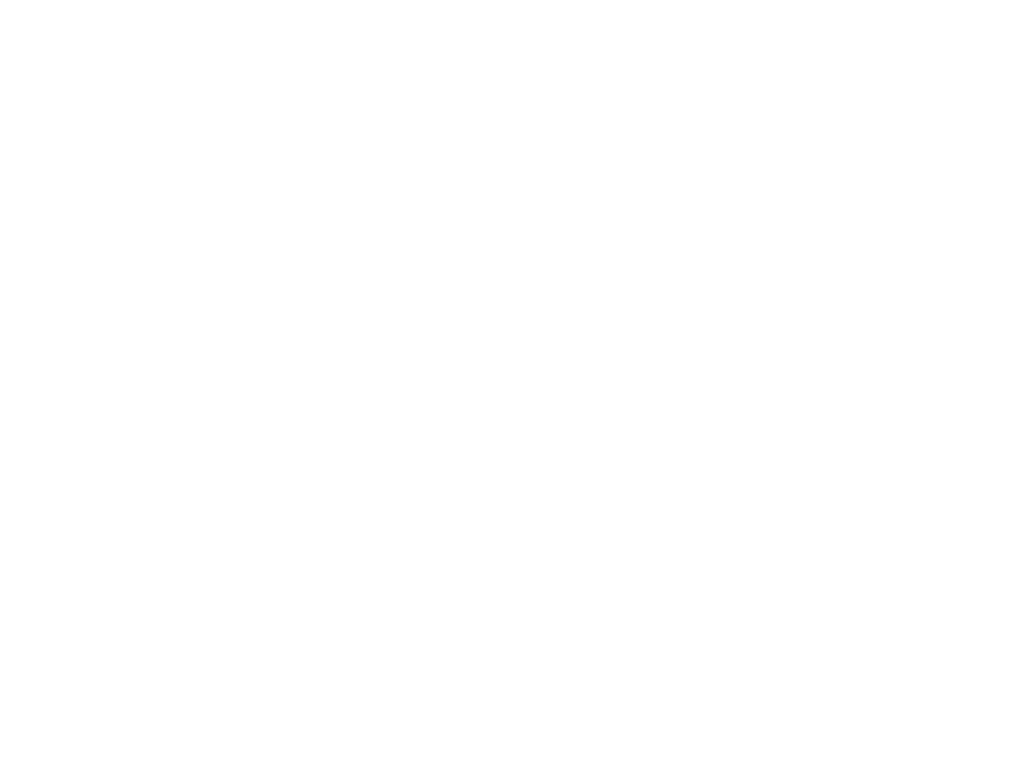

In [319]:

df_uniq = df.drop_duplicates(subset=['Year', 'country'])
df_uniq['country'].fillna('Unknown', inplace=True) # Preencha os valores NaN na coluna 'country' com 'Unknown'
contagem_paises = df_uniq['country'].value_counts().reset_index()# Calcula o número de sedes olímpicas por país
contagem_paises.columns = ['country', 'num_sedes']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'].fillna('Unknown', inplace=True) # Preencha os valores NaN na coluna 'name' do GeoDataFrame com 'Unknown'
world = world.merge(contagem_paises, how='left', left_on='name', right_on='country')# Junta os dados do mapa-múndi com os dados de contagem de sedes olímpicas
world['num_sedes'].fillna(0, inplace=True)# Preenche os valores ausentes na coluna 'num_sedes' com 0

fig, ax = plt.subplots(figsize=(15, 5))
world.plot(ax=ax, column='num_sedes', cmap='YlGnBu', linewidth=0.8, edgecolor='0.8', legend=False)


plt.xticks([])
plt.yticks([])

#Legenda
cax = plt.gca()
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=Normalize(vmin=world['num_sedes'].min(), vmax=world['num_sedes'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=cax, orientation='vertical', pad=0.02)
cbar.outline.set_linewidth(0.5)  # Definindo a espessura da linha da legenda

# Defina os valores específicos que deseja mostrar na legenda
valores_legenda = [0, 1, 2, 3, 4]  # Por exemplo, mostrar apenas os números de 0 a 4
cbar.set_ticks(valores_legenda)
cbar.set_ticklabels(valores_legenda)

cbar.set_label('Número de Sedes Olímpicas')

plt.title('Mapa de Calor:Número de Sedes Olímpicas por País')
plt.show()
plt.axis('off')
plt.savefig('mapa_mundi.png', bbox_inches='tight', pad_inches=0)



**Analisando o mapa podemos ver os países ocidentais dominando no quesito sede das olimpiadas, Isso se dá por questões historicas
e de influência entre os países, Agora podemos verificar se quando os países foram sedes eles tiveram mais medalhas**

### 4.9 Comparar a retrospectiva dos países sede

In [324]:
df_sede_por_pais = df[df['country'] == df['Team']]


contagem_medalhas_por_pais = df_sede_por_pais.groupby('country')['Medal'].count().reset_index()
contagem_medalhas_por_pais.columns = ['country', 'num_medalhas']

In [325]:
contagem_medalhas_por_pais

,country,num_medalhas
0,Australia,301
1,Austria,14
2,Belgium,95
3,Brazil,46
4,Canada,187
5,China,170
6,Finland,35
7,France,882
8,Germany,435
9,Greece,48


In [327]:
print("Médias por país:")
for country, media in medias.items():
    print(f"{country}: {media}")

Médias por país:
United States: 196.33333333333334
United Kingdom: 984.0
France: 220.5
Germany: 145.0
Australia: 150.5
Japan: 69.66666666666667
Spain: 207.0
Canada: 62.333333333333336
Italy: 85.0
China: 170.0
Sweden: 158.0
Netherlands: 102.0
Belgium: 95.0
South Korea: 75.0
Russia: 28.0
Norway: 24.5
Greece: 48.0
Brazil: 46.0
Finland: 35.0
Austria: 14.0
Mexico: 9.0


**Comparando, podemos perceber que muitos países têm um aumento significativo no número de medalhas quando sediam as Olimpíadas, o que sugere que o país anfitrião possui uma vantagem competitiva.**

### 4.10 Analisando os grupos

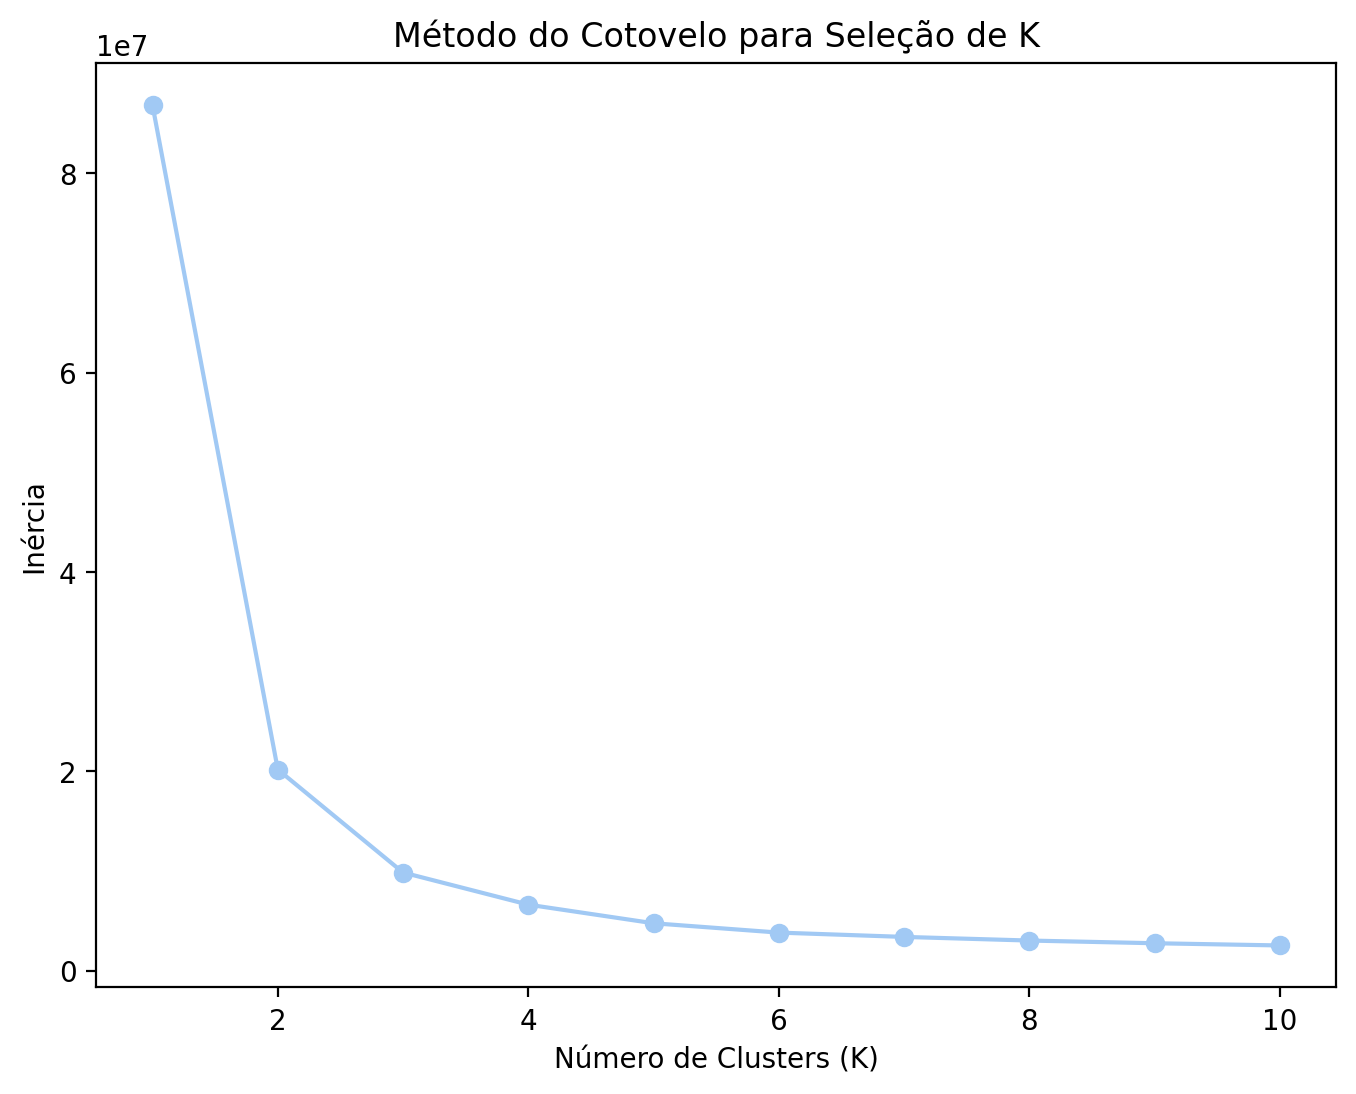

In [336]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'Year']])  # Selecione as características relevantes
    inertia.append(kmeans.inertia_)

# Plotar a curva de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Seleção de K')
plt.show()

In [339]:
# Escolher um valor de K com base no método do cotovelo
k = 2

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['Age', 'Year']])  # Selecione as características relevantes

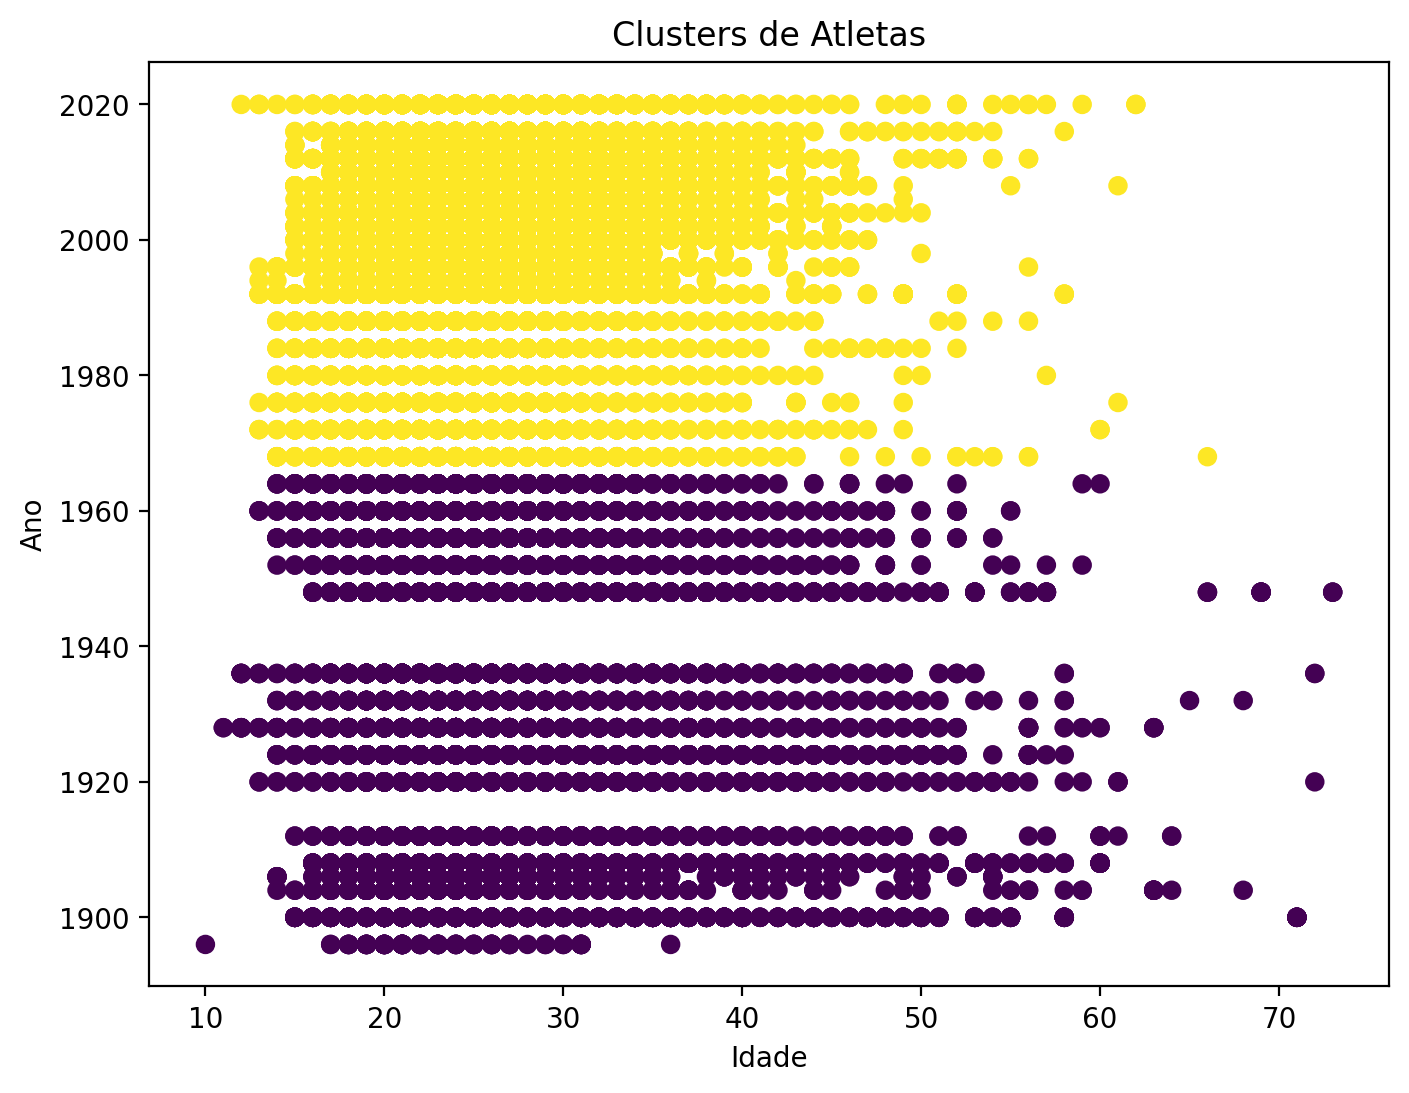

In [340]:
# Plotar os clusters em um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Year'], c=df['cluster'], cmap='viridis')
plt.xlabel('Idade')
plt.ylabel('Ano')
plt.title('Clusters de Atletas')
plt.show()

**Podemos observar que foram identificados 2 grupos distintos. Nota-se que, no passado, tínhamos uma diversidade maior de faixas etárias em comparação com os dias atuais. Isso pode ser atribuído ao fato de que, antigamente, os esportes eram mais um hobby do que uma profissão. Nos últimos anos, os esportes têm se profissionalizado cada vez mais, resultando em uma seleção mais rigorosa dos melhores competidores. Isso pode explicar a concentração de pontos amarelos no gráfico, em contraste com o grupo roxo, que está mais disperso.**

## 5 Conclusão

Ao longo deste trabalho, exploramos extensivamente o histórico dos Jogos Olímpicos, desde suas primeiras edições em 1896 até os eventos mais recentes em 2020. Utilizamos um conjunto de dados abrangente para extrair insights valiosos sobre o panorama olímpico mundial.

Inicialmente, analisamos o desempenho dos países, identificando os líderes em medalhas ao longo dos anos. Destacamos a dominância de nações como os Estados Unidos, o Reino Unido e a França, enquanto também observamos o impacto de países como a União Soviética e a Rússia.

Além disso, investigamos o número de vezes que cada país sediou os Jogos Olímpicos e como isso pode influenciar seu desempenho em termos de medalhas. Descobrimos que sediar os Jogos muitas vezes resulta em um aumento significativo no número de medalhas ganhas pelos países anfitriões.

Ao analisar a idade dos atletas medalhistas, observamos uma mudança ao longo do tempo, com uma tendência para atletas mais jovens nos dias atuais, refletindo a profissionalização crescente dos esportes.

Utilizamos técnicas de clusterização, como o algoritmo k-means, para identificar padrões nos dados e agrupar atletas com características semelhantes. Isso nos permitiu visualizar como as características dos atletas mudaram ao longo do tempo, especialmente em relação à idade e ao ano de participação.

Em suma, este trabalho oferece uma visão abrangente do mundo olímpico, destacando tendências, padrões e mudanças ao longo dos anos. Ele nos ajuda a entender melhor a evolução dos Jogos Olímpicos e os fatores que moldam o desempenho dos países e dos atletas.






